# Importing Libraries

In [1]:
import re
from collections import Counter

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk import pos_tag, RegexpParser
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

# Text

In [2]:
text = open('illiad.txt', encoding = 'utf-8').read()

In [3]:
print(text)

The Iliad of Homer


Translated by Alexander Pope,

with notes by the
Rev. Theodore Alois Buckley, M.A., F.S.A.

and

Flaxman's Designs.

1899





CONTENTS


INTRODUCTION.
POPE'S PREFACE TO THE ILIAD OF HOMER
BOOK I.
BOOK II.
BOOK III.
BOOK IV.
BOOK V.
BOOK VI.
BOOK VII.
BOOK VIII.
BOOK IX.
BOOK X.
BOOK XI.
BOOK XII.
BOOK XIII.
BOOK XIV.
BOOK XV.
BOOK XVI.
BOOK XVII.
BOOK XVIII.
BOOK XIX.
BOOK XX.
BOOK XXI.
BOOK XXII.
BOOK XXIII.
BOOK XXIV.
CONCLUDING NOTE.





ILLUSTRATIONS


HOMER INVOKING THE MUSE.
MARS.
MINERVA REPRESSING THE FURY OF ACHILLES.
THE DEPARTURE OF BRISEIS FROM THE TENT OF ACHILLES.
THETIS CALLING BRIAREUS TO THE ASSISTANCE OF JUPITER.
THETIS ENTREATING JUPITER TO HONOUR ACHILLES.
VULCAN.
JUPITER.
THE APOTHEOSIS OF HOMER.
JUPITER SENDING THE EVIL DREAM TO AGAMEMNON.
NEPTUNE.
VENUS, DISGUISED, INVITING HELEN TO THE CHAMBER OF PARIS.
VENUS PRESENTING HELEN TO PARIS.
VENUS.
Map, titled "Graeciae Antiquae".
THE COUNCIL OF THE GODS.
Map of the Plain of Troy.
VENUS, WOUNDED

# Preprocessing

## Noise Removal

In [4]:
text = re.sub(r'\n', ' ', text)

In [5]:
print(text)

The Iliad of Homer   Translated by Alexander Pope,  with notes by the Rev. Theodore Alois Buckley, M.A., F.S.A.  and  Flaxman's Designs.  1899      CONTENTS   INTRODUCTION. POPE'S PREFACE TO THE ILIAD OF HOMER BOOK I. BOOK II. BOOK III. BOOK IV. BOOK V. BOOK VI. BOOK VII. BOOK VIII. BOOK IX. BOOK X. BOOK XI. BOOK XII. BOOK XIII. BOOK XIV. BOOK XV. BOOK XVI. BOOK XVII. BOOK XVIII. BOOK XIX. BOOK XX. BOOK XXI. BOOK XXII. BOOK XXIII. BOOK XXIV. CONCLUDING NOTE.      ILLUSTRATIONS   HOMER INVOKING THE MUSE. MARS. MINERVA REPRESSING THE FURY OF ACHILLES. THE DEPARTURE OF BRISEIS FROM THE TENT OF ACHILLES. THETIS CALLING BRIAREUS TO THE ASSISTANCE OF JUPITER. THETIS ENTREATING JUPITER TO HONOUR ACHILLES. VULCAN. JUPITER. THE APOTHEOSIS OF HOMER. JUPITER SENDING THE EVIL DREAM TO AGAMEMNON. NEPTUNE. VENUS, DISGUISED, INVITING HELEN TO THE CHAMBER OF PARIS. VENUS PRESENTING HELEN TO PARIS. VENUS. Map, titled "Graeciae Antiquae". THE COUNCIL OF THE GODS. Map of the Plain of Troy. VENUS, WOUNDED

## Lowering

In [6]:
text = text.lower()

In [7]:
print(text)

the iliad of homer   translated by alexander pope,  with notes by the rev. theodore alois buckley, m.a., f.s.a.  and  flaxman's designs.  1899      contents   introduction. pope's preface to the iliad of homer book i. book ii. book iii. book iv. book v. book vi. book vii. book viii. book ix. book x. book xi. book xii. book xiii. book xiv. book xv. book xvi. book xvii. book xviii. book xix. book xx. book xxi. book xxii. book xxiii. book xxiv. concluding note.      illustrations   homer invoking the muse. mars. minerva repressing the fury of achilles. the departure of briseis from the tent of achilles. thetis calling briareus to the assistance of jupiter. thetis entreating jupiter to honour achilles. vulcan. jupiter. the apotheosis of homer. jupiter sending the evil dream to agamemnon. neptune. venus, disguised, inviting helen to the chamber of paris. venus presenting helen to paris. venus. map, titled "graeciae antiquae". the council of the gods. map of the plain of troy. venus, wounded

# Sentence Tokenization

In [8]:
sentences = sent_tokenize(text)

In [9]:
print(sentences)

['the iliad of homer   translated by alexander pope,  with notes by the rev.', 'theodore alois buckley, m.a., f.s.a.', "and  flaxman's designs.", '1899      contents   introduction.', "pope's preface to the iliad of homer book i. book ii.", 'book iii.', 'book iv.', 'book v. book vi.', 'book vii.', 'book viii.', 'book ix.', 'book x. book xi.', 'book xii.', 'book xiii.', 'book xiv.', 'book xv.', 'book xvi.', 'book xvii.', 'book xviii.', 'book xix.', 'book xx.', 'book xxi.', 'book xxii.', 'book xxiii.', 'book xxiv.', 'concluding note.', 'illustrations   homer invoking the muse.', 'mars.', 'minerva repressing the fury of achilles.', 'the departure of briseis from the tent of achilles.', 'thetis calling briareus to the assistance of jupiter.', 'thetis entreating jupiter to honour achilles.', 'vulcan.', 'jupiter.', 'the apotheosis of homer.', 'jupiter sending the evil dream to agamemnon.', 'neptune.', 'venus, disguised, inviting helen to the chamber of paris.', 'venus presenting helen to par

# Word Tokenization

In [10]:
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

In [11]:
print(tokenized_sentences)

[['the', 'iliad', 'of', 'homer', 'translated', 'by', 'alexander', 'pope', ',', 'with', 'notes', 'by', 'the', 'rev', '.'], ['theodore', 'alois', 'buckley', ',', 'm.a.', ',', 'f.s.a', '.'], ['and', 'flaxman', "'s", 'designs', '.'], ['1899', 'contents', 'introduction', '.'], ['pope', "'s", 'preface', 'to', 'the', 'iliad', 'of', 'homer', 'book', 'i.', 'book', 'ii', '.'], ['book', 'iii', '.'], ['book', 'iv', '.'], ['book', 'v.', 'book', 'vi', '.'], ['book', 'vii', '.'], ['book', 'viii', '.'], ['book', 'ix', '.'], ['book', 'x.', 'book', 'xi', '.'], ['book', 'xii', '.'], ['book', 'xiii', '.'], ['book', 'xiv', '.'], ['book', 'xv', '.'], ['book', 'xvi', '.'], ['book', 'xvii', '.'], ['book', 'xviii', '.'], ['book', 'xix', '.'], ['book', 'xx', '.'], ['book', 'xxi', '.'], ['book', 'xxii', '.'], ['book', 'xxiii', '.'], ['book', 'xxiv', '.'], ['concluding', 'note', '.'], ['illustrations', 'homer', 'invoking', 'the', 'muse', '.'], ['mars', '.'], ['minerva', 'repressing', 'the', 'fury', 'of', 'achille

# Part-Of-Speech Tagging

In [12]:
tagged = [pos_tag(tokenized_sentence) for tokenized_sentence in tokenized_sentences]

In [13]:
print(tagged[222])

[('we', 'PRP'), ('are', 'VBP'), ('perpetually', 'RB'), ('labouring', 'VBG'), ('to', 'TO'), ('destroy', 'VB'), ('our', 'PRP$'), ('delights', 'NNS'), (',', ','), ('our', 'PRP$'), ('composure', 'NN'), (',', ','), ('our', 'PRP$'), ('devotion', 'NN'), ('to', 'TO'), ('superior', 'JJ'), ('power', 'NN'), ('.', '.')]


In [14]:
print(tagged[223])

[('of', 'IN'), ('all', 'PDT'), ('the', 'DT'), ('animals', 'NNS'), ('on', 'IN'), ('earth', 'NN'), ('we', 'PRP'), ('least', 'VBP'), ('know', 'VB'), ('what', 'WP'), ('is', 'VBZ'), ('good', 'JJ'), ('for', 'IN'), ('us', 'PRP'), ('.', '.')]


# Parsing

# NP-Chunking

- Noun Phrase: An optional determiner `DT`, followed by any number of adjectives `JJ`, followed by a noun `NN`.

In [15]:
NP_Chunk_Grammer = "NP: {<DT>?<JJ>*<NN>}"

In [16]:
NP_Chunk_Parser = RegexpParser(NP_Chunk_Grammer)

In [17]:
NP_Chunked_Text = [NP_Chunk_Parser.parse(sentence) for sentence in tagged]

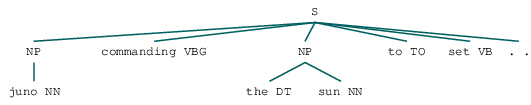

In [18]:
NP_Chunked_Text[80]

In [19]:
NP_Chunked_Text[80].subtrees

<bound method Tree.subtrees of Tree('S', [Tree('NP', [('juno', 'NN')]), ('commanding', 'VBG'), Tree('NP', [('the', 'DT'), ('sun', 'NN')]), ('to', 'TO'), ('set', 'VB'), ('.', '.')])>

In [20]:
NP_Chunks = []

for chunked_sentence in NP_Chunked_Text:
    for subtree in chunked_sentence.subtrees(filter = lambda x: x.label() == 'NP'):
        NP_Chunks.append((tuple(subtree)))

In [21]:
NP_Chunks

[(('the', 'DT'), ('iliad', 'NN')),
 (('homer', 'NN'),),
 (('alexander', 'NN'),),
 (('pope', 'NN'),),
 (('the', 'DT'), ('rev', 'NN')),
 (('alois', 'JJ'), ('buckley', 'NN')),
 (('m.a.', 'NN'),),
 (('f.s.a', 'NN'),),
 (('flaxman', 'NN'),),
 (('introduction', 'NN'),),
 (('pope', 'NN'),),
 (('preface', 'NN'),),
 (('the', 'DT'), ('iliad', 'NN')),
 (('homer', 'NN'),),
 (('book', 'NN'),),
 (('i.', 'NN'),),
 (('book', 'NN'),),
 (('ii', 'NN'),),
 (('book', 'NN'),),
 (('iii', 'NN'),),
 (('book', 'NN'),),
 (('iv', 'NN'),),
 (('book', 'NN'),),
 (('v.', 'NN'),),
 (('book', 'NN'),),
 (('vi', 'NN'),),
 (('book', 'NN'),),
 (('vii', 'NN'),),
 (('book', 'NN'),),
 (('viii', 'NN'),),
 (('book', 'NN'),),
 (('ix', 'NN'),),
 (('book', 'NN'),),
 (('book', 'NN'),),
 (('xi', 'NN'),),
 (('book', 'NN'),),
 (('xii', 'NN'),),
 (('book', 'NN'),),
 (('xiii', 'NN'),),
 (('book', 'NN'),),
 (('xiv', 'NN'),),
 (('book', 'NN'),),
 (('xv', 'NN'),),
 (('book', 'NN'),),
 (('xvi', 'NN'),),
 (('book', 'NN'),),
 (('xvii', 'NN'),

# VP-Chunking

- Verp Phrase: A noun phrase, followed by a verb `VB`, followed by an optional adverb `RB`.

In [22]:
VP_Chunk_Grammer = "VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}"

In [23]:
VP_Chunk_Parser = RegexpParser(VP_Chunk_Grammer)

In [24]:
VP_Chunked_Text = [VP_Chunk_Parser.parse(sentence) for sentence in tagged]

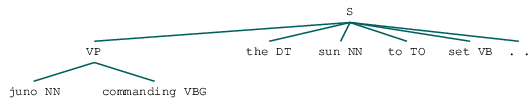

In [25]:
VP_Chunked_Text[80]

In [26]:
VP_Chunked_Text[80].subtrees

<bound method Tree.subtrees of Tree('S', [Tree('VP', [('juno', 'NN'), ('commanding', 'VBG')]), ('the', 'DT'), ('sun', 'NN'), ('to', 'TO'), ('set', 'VB'), ('.', '.')])>

In [27]:
VP_Chunks = []

for chunked_sentence in VP_Chunked_Text:
    for subtree in chunked_sentence.subtrees(filter = lambda x: x.label() == 'VP'):
        VP_Chunks.append((tuple(subtree)))

In [28]:
VP_Chunks

[(('homer', 'NN'), ('translated', 'VBN')),
 (('minerva', 'NN'), ('repressing', 'VBG')),
 (('thetis', 'NN'), ('calling', 'VBG')),
 (('thetis', 'NN'), ('entreating', 'VBG')),
 (('jupiter', 'NN'), ('sending', 'VBG')),
 (('venus', 'NN'), ('presenting', 'VBG')),
 (('hector', 'NN'), ('chiding', 'VBG')),
 (('ajax', 'NN'), ('separated', 'VBN')),
 (('minerva', 'NN'), ('going', 'VBG')),
 (('polydamas', 'NN'), ('advising', 'VBG')),
 (('ajax', 'NN'), ('defending', 'VBG')),
 (('death', 'NN'), ('conveying', 'VBG')),
 (('thetis', 'NN'), ('ordering', 'VBG')),
 (('juno', 'NN'), ('commanding', 'VBG')),
 (('thetis', 'NN'), ('bringing', 'VBG')),
 (('iris', 'NN'), ('advises', 'VBZ')),
 (('scepticism', 'NN'), ('is', 'VBZ'), ('as', 'RB')),
 (('knowledge', 'NN'), ('is', 'VBZ')),
 (('this', 'DT'), ('difficulty', 'NN'), ('attaches', 'VBZ')),
 (('progress', 'NN'), ('has', 'VBZ')),
 (('probability', 'NN'), ('is', 'VBZ')),
 (('historical', 'JJ'), ('evidence', 'NN'), ('is', 'VBZ')),
 (('consistency', 'NN'), ('is', 

# Chunks Counter

In [29]:
NP_Chunks_Counter = Counter()

In [30]:
VP_Chunks_Counter = Counter()

## Couning NP Chunks

In [31]:
for chunk in NP_Chunks:
    NP_Chunks_Counter[chunk] += 1

## Couning VP Chunks

In [32]:
for chunk in VP_Chunks:
    VP_Chunks_Counter[chunk] += 1

# Discovering Insights

In [33]:
NP_Chunks_Counter.most_common(20)

[((('hector', 'NN'),), 323),
 ((('i', 'NN'),), 274),
 ((('jove', 'NN'),), 257),
 ((('troy', 'NN'),), 208),
 ((('vain', 'NN'),), 195),
 ((('war', 'NN'),), 193),
 ((('son', 'NN'),), 170),
 ((('thou', 'NN'),), 158),
 ((('the', 'DT'), ('plain', 'NN')), 157),
 ((('the', 'DT'), ('field', 'NN')), 154),
 ((('the', 'DT'), ('ground', 'NN')), 138),
 ((('death', 'NN'),), 134),
 ((('hand', 'NN'),), 134),
 ((('greece', 'NN'),), 128),
 ((('heaven', 'NN'),), 127),
 ((('fate', 'NN'),), 127),
 ((('breast', 'NN'),), 122),
 ((('thee', 'NN'),), 122),
 ((('the', 'DT'), ('trojan', 'NN')), 120),
 ((('the', 'DT'), ('god', 'NN')), 119)]

In [34]:
X, Y = map(list, zip(*NP_Chunks_Counter.most_common(20)))

/home/muhammad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

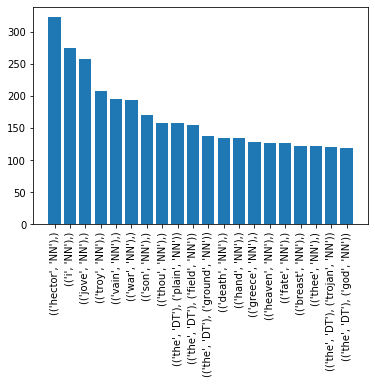

In [35]:
%matplotlib inline

plt.bar(range(len(X)), Y)

ax = plt.subplot()
ax.set_xticks(range(len(X)))
ax.set_xticklabels(X)
plt.xticks(rotation = 90)

In [36]:
VP_Chunks_Counter.most_common(20)

[((("'t", 'NN'), ('is', 'VBZ')), 19),
 ((('i', 'NN'), ('am', 'VBP')), 11),
 ((("'t", 'NN'), ('was', 'VBD')), 11),
 ((('the', 'DT'), ('hero', 'NN'), ('said', 'VBD')), 9),
 ((('i', 'NN'), ('know', 'VBP')), 8),
 ((('i', 'NN'), ('saw', 'VBD')), 8),
 ((('the', 'DT'), ('scene', 'NN'), ('lies', 'VBZ')), 7),
 ((('i', 'NN'), ('was', 'VBD')), 6),
 ((('view', 'NN'), ("'d", 'VBD')), 6),
 ((('confess', 'NN'), ("'d", 'VBD')), 6),
 ((('the', 'DT'), ('scene', 'NN'), ('is', 'VBZ')), 6),
 ((('i', 'NN'), ('felt', 'VBD')), 5),
 ((('i', 'NN'), ('bear', 'VBP')), 5),
 ((('press', 'NN'), ("'d", 'VBD')), 5),
 ((('hector', 'NN'), ('is', 'VBZ')), 5),
 ((('vain', 'NN'), ('was', 'VBD')), 5),
 ((('homer', 'NN'), ('was', 'VBD')), 4),
 ((('i', 'NN'), ('have', 'VBP')), 4),
 ((('hunger', 'NN'), ('was', 'VBD')), 4),
 ((('glory', 'NN'), ('lost', 'VBN')), 4)]

In [37]:
X, Y = map(list, zip(*VP_Chunks_Counter.most_common(20)))

/home/muhammad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

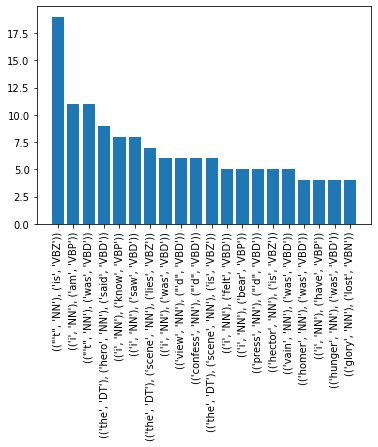

In [38]:
%matplotlib inline

plt.bar(range(len(X)), Y)

ax = plt.subplot()
ax.set_xticks(range(len(X)))
ax.set_xticklabels(X)
plt.xticks(rotation = 90)

## General Frequency Distribution

### Stop Words & Punctuations Removal 

In [39]:
stop_words = list(set(stopwords.words('english')))

In [40]:
words = [word for word in regexp_tokenize(text, pattern = "[\w'\.]+") if word not in stop_words]

In [41]:
words

['iliad',
 'homer',
 'translated',
 'alexander',
 'pope',
 'notes',
 'rev.',
 'theodore',
 'alois',
 'buckley',
 'm.a.',
 'f.s.a.',
 "flaxman's",
 'designs.',
 '1899',
 'contents',
 'introduction.',
 "pope's",
 'preface',
 'iliad',
 'homer',
 'book',
 'i.',
 'book',
 'ii.',
 'book',
 'iii.',
 'book',
 'iv.',
 'book',
 'v.',
 'book',
 'vi.',
 'book',
 'vii.',
 'book',
 'viii.',
 'book',
 'ix.',
 'book',
 'x.',
 'book',
 'xi.',
 'book',
 'xii.',
 'book',
 'xiii.',
 'book',
 'xiv.',
 'book',
 'xv.',
 'book',
 'xvi.',
 'book',
 'xvii.',
 'book',
 'xviii.',
 'book',
 'xix.',
 'book',
 'xx.',
 'book',
 'xxi.',
 'book',
 'xxii.',
 'book',
 'xxiii.',
 'book',
 'xxiv.',
 'concluding',
 'note.',
 'illustrations',
 'homer',
 'invoking',
 'muse.',
 'mars.',
 'minerva',
 'repressing',
 'fury',
 'achilles.',
 'departure',
 'briseis',
 'tent',
 'achilles.',
 'thetis',
 'calling',
 'briareus',
 'assistance',
 'jupiter.',
 'thetis',
 'entreating',
 'jupiter',
 'honour',
 'achilles.',
 'vulcan.',
 'jupi

In [42]:
frequency = {}

In [43]:
for token in words:
    if frequency.get(token):
        frequency[token] += 1
    else:
        frequency[token] = 1

In [44]:
frequency = {key: value for key, value in sorted(frequency.items(), key = lambda item: item[1], reverse = True)}
frequency

{'thy': 931,
 'thus': 606,
 'shall': 507,
 'great': 454,
 'arms': 401,
 "o'er": 353,
 'hector': 351,
 'thou': 340,
 'jove': 319,
 'one': 302,
 'yet': 302,
 'achilles': 285,
 'gods': 284,
 'let': 279,
 'first': 274,
 'war': 268,
 'son': 267,
 'god': 259,
 'chief': 255,
 'troy': 243,
 'hand': 233,
 'whose': 230,
 'high': 230,
 'like': 223,
 'trojan': 221,
 'heaven': 216,
 'day': 210,
 'greece': 210,
 'eyes': 207,
 'thee': 202,
 'may': 198,
 'fate': 196,
 'plain': 195,
 'greeks': 195,
 'fight': 192,
 'force': 192,
 'vain': 191,
 'said': 187,
 'king': 179,
 'rage': 178,
 'field': 175,
 'man': 173,
 'long': 172,
 'round': 172,
 'far': 169,
 'bold': 169,
 'still': 168,
 'every': 167,
 'fierce': 161,
 'brave': 160,
 'race': 159,
 'around': 157,
 'grecian': 154,
 'breast': 154,
 'till': 152,
 'ajax': 149,
 'fair': 149,
 'must': 148,
 'soul': 146,
 'death': 144,
 'spoke': 142,
 'sacred': 142,
 'swift': 141,
 'train': 140,
 'head': 139,
 'arm': 138,
 'care': 138,
 'ye': 138,
 'fall': 137,
 'stoo

In [45]:
X = list(frequency.keys())

In [46]:
Y = list(frequency.values())

In [47]:
X = X[:20]

In [48]:
print(X)

['thy', 'thus', 'shall', 'great', 'arms', "o'er", 'hector', 'thou', 'jove', 'one', 'yet', 'achilles', 'gods', 'let', 'first', 'war', 'son', 'god', 'chief', 'troy']


In [49]:
Y = Y[:20]

In [50]:
print(Y)

[931, 606, 507, 454, 401, 353, 351, 340, 319, 302, 302, 285, 284, 279, 274, 268, 267, 259, 255, 243]


/home/muhammad/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

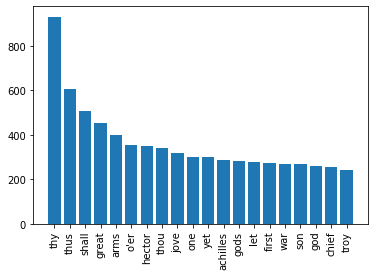

In [51]:
%matplotlib inline

plt.bar(range(len(X)), Y)

ax = plt.subplot()
ax.set_xticks(range(len(X)))
ax.set_xticklabels(X)
plt.xticks(rotation = 90)